In [4]:
import pandas as pd

In [5]:
URL="https://www.data.gouv.fr/fr/datasets/r/7a1b0526-b35b-4885-9d31-bd2fdf15e4cb"
data=pd.read_csv(URL,
                    sep=";",
                    low_memory=False,
                    parse_dates=["journey_start_date","journey_start_datetime","journey_end_datetime","journey_end_date"]
)

1. Type de données. 

L'affichage du type de données permet dans un premier temps d'avoir en un coup d'oeil le type de données que nous avons. Le type "object" se comporte la plupart du temps comme un type string. Mais il peut s'agir d'un mélange de str et int parfois, ou un mélange de date et str. 

Spécifier à l'ouverture le type de données est possible et il vaut mieux spécifier un type str dans le doute.

In [17]:
pd.Series(data.dtypes, index=data.columns, name='Type de données')

journey_id                                      int64
trip_id                                        object
journey_start_datetime      datetime64[ns, UTC+02:00]
journey_start_date                     datetime64[ns]
journey_start_time                             object
journey_start_lon                             float64
journey_start_lat                             float64
journey_start_insee                            object
journey_start_department                       object
journey_start_town                             object
journey_start_towngroup                        object
journey_start_country                          object
journey_end_datetime        datetime64[ns, UTC+02:00]
journey_end_date                       datetime64[ns]
journey_end_time                               object
journey_end_lon                               float64
journey_end_lat                               float64
journey_end_insee                              object
journey_end_department      

2. Valeurs minimales et maximales

Pour les valeurs qui semblent ordonnées (int, float, date) il est intéressant d'afficher les minimums et maximums. Cette action permet de repérer les valeurs abérrantes et les éventuelles erreurs. On tatonne légèrement pour la liste, par exemple quand je laissais le journey_start_department, une erreur apparaissait car cette colonne contient un mélange d'objet int et str.

In [18]:
list_=[]
for i in ['journey_start_datetime','journey_start_date', 'journey_start_time', 'journey_start_lon',
       'journey_start_lat', 'journey_start_insee',
        'journey_end_datetime', 'journey_end_date',
       'journey_end_time', 'journey_end_lon', 'journey_end_lat',
       'journey_end_insee','journey_distance', 'journey_duration']:

    list_.append([i, data[i].min(), data[i].max()])

pd.DataFrame(list_, columns=["Attribut","Valeur min", "Valeur max"])

,Attribut,Valeur min,Valeur max
0,journey_start_datetime,2024-06-01 00:00:00+02:00,2024-06-30 23:50:00+02:00
1,journey_start_date,2024-06-01 00:00:00,2024-06-30 00:00:00
2,journey_start_time,00:00:00,23:50:00
3,journey_start_lon,-61.767,55.829
4,journey_start_lat,-21.387,54.18
5,journey_start_insee,01004,99140
6,journey_end_datetime,2024-06-01 00:00:00+02:00,2024-07-01 01:00:00+02:00
7,journey_end_date,2024-06-01 00:00:00,2024-07-01 00:00:00
8,journey_end_time,00:00:00,23:50:00
9,journey_end_lon,-61.782,55.827


Ici, les latitudes et longitudes semblent cohérentes (si l'on prend en compte les collectivités d'outre-mer). Mais pour pleinement vérifier il faudrait avoir le contour géographique de la France métropolitaine et de ses COM et vérifier si les points appartiennent aux surfaces. 


RAS sur les dates. Néanmoins, les dates sont cruciales pour le calcul de l'indicateur, il faudra donc être vigilant sur ces données et prévoir des étapes de nettoyages pour parer d'éventuelles erreurs. 


Les codes INSEE sont correctes mais les numéros commencant par 99 sont des pays étrangers, il faudra s'assurer qu'il n'y ait pas de voyages purement effectués à l'étranger. 


Pour la distance, il y a des valeurs aberrantes : 95 m miminum. La valeur max reste cohérente (La France fait 1000km selon les axes Sud-Nord et Ouest-Est).
Idem pour la durée du voyage : valeur minimale aberrante (0 minutes), valeur maximale plutôt cohérente ()


Médiane: 21.0 min
Moyenne 21.0 min
Intervalle quantile 2,5%-97,5% 4.0 56.0 min


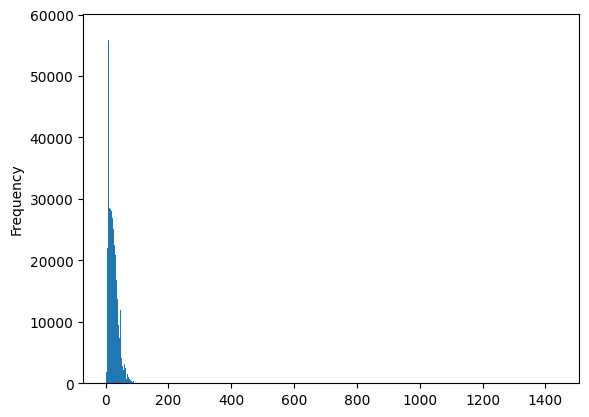

In [19]:
data["journey_duration"].plot(kind='hist', bins=1000)
print("Médiane:", data["journey_duration"].median(), "min")
print("Moyenne", data["journey_duration"].median(), "min")
print("Intervalle quantile 2,5%-97,5%", data["journey_duration"].quantile(q=0.025), data["journey_duration"].quantile(q=0.975), "min")

Médiane: 18619.0 mètres
Moyenne 18619.0 mètres
Intervalle quantile 2,5%-97,5% 2196.0 64250.0 mètres


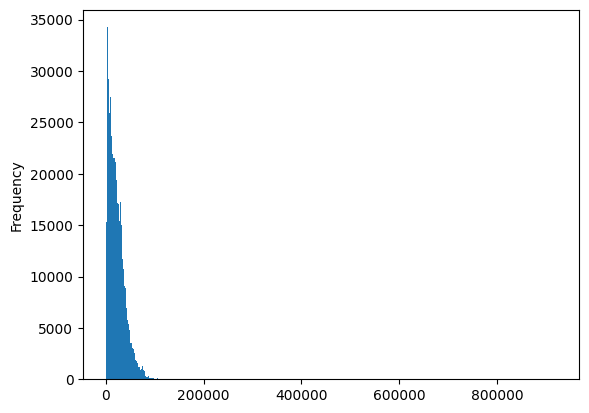

In [20]:
data["journey_distance"].plot(kind='hist', bins=1000)
print("Médiane:", data["journey_distance"].median(), "mètres")
print("Moyenne", data["journey_distance"].median(), "mètres")
print("Intervalle quantile 2,5%-97,5%", data["journey_distance"].quantile(q=0.025), data["journey_distance"].quantile(q=0.975), "mètres")

Que ce soit la distance des covoiturages ou leur durée, la distribution des valeurs restent correctes. Il y aurait peut-être des valeurs basses à éliminer. 

3. Nombre de classes pour les autres attributs

In [29]:
print("Il y a eu ",len(data),"trajets de covoiturage")

Il y a eu  973640 trajets de covoiturage


In [28]:
list_=[]
for i in ['journey_id', 'trip_id','journey_start_department',
        'journey_start_town', 'journey_start_towngroup', 'journey_start_country',
        'journey_end_department', 'journey_end_town',
        'journey_end_towngroup', 'journey_end_country',
        'operator_class','has_incentive']:

    list_.append([i,len(data[i].unique())])

pd.DataFrame(list_, columns=["Attribut","Nombre de classes"])

,Attribut,Nombre de classes
0,journey_id,973640
1,trip_id,818604
2,journey_start_department,101
3,journey_start_town,8281
4,journey_start_towngroup,1107
5,journey_start_country,10
6,journey_end_department,101
7,journey_end_town,8029
8,journey_end_towngroup,1093
9,journey_end_country,11


Le nombre de journey_id différent correspond au nombre de covoiturage : cela était attendu car il s'agit de la clé primaire du registre de covoiturage. 

101 Départements différents sont présents, ce qui correspond au nombre de Département. 

Il y a bien trois operator_class (classes de preuve)

4. Tableau croisé des pays de départ et d'arrivée pour les covoiturages

In [22]:
core=pd.pivot_table(data, values="journey_id", 
                     index="journey_start_country", columns="journey_end_country",
                     aggfunc="count").fillna(0)
core

journey_end_country,ALLEMAGNE,ANDORRE,BELGIQUE,ESPAGNE,France,GRECE,ITALIE,LUXEMBOURG,MONACO,PORTUGAL,SUISSE
journey_start_country,,,,,,,,,,,
ALLEMAGNE,8.0,0.0,0.0,0.0,140.0,0.0,0.0,1.0,0.0,0.0,0.0
BELGIQUE,0.0,0.0,79.0,0.0,285.0,0.0,0.0,486.0,0.0,0.0,0.0
ESPAGNE,0.0,0.0,0.0,3430.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0
France,141.0,1.0,263.0,45.0,926549.0,0.0,154.0,933.0,4831.0,0.0,13506.0
GRECE,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0
ITALIE,0.0,0.0,0.0,0.0,160.0,0.0,25.0,0.0,2219.0,0.0,0.0
LUXEMBOURG,1.0,0.0,502.0,0.0,884.0,0.0,0.0,458.0,0.0,0.0,0.0
MONACO,0.0,0.0,0.0,0.0,4150.0,0.0,2121.0,0.0,4.0,0.0,0.0
PORTUGAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0


Comme pressenti, il y a des trajets qui ont été réalisés complètement en dehors de la France. On remarque au passage que les pays ont leur nom en majuscule mais pas la France. Un retraitement de la case, mais aussi des erreurs possibles sur le mot France parait opportun. 

In [23]:
print("Il y a eu ",
      len(data[(data["journey_start_country"]!="France") & (data["journey_start_country"]!="France")]),
      " trajets de covoiturage totalement effectués en dehors de la France")

Il y a eu  27217  trajets de covoiturage totalement effectués en dehors de la France


5. Certification des trajets

In [24]:
data["operator_class"].value_counts()

operator_class
C    939268
B     21718
A     12654
Name: count, dtype: int64

La très grande majorités des trajets sont certifiés Classe C, la plus haute classe de preuve. On peut donc raisonablement penser que tous les trajets ont réellement eu lieu.

6. Calcul de l'indicateur

In [25]:
indicateur=data[["journey_start_date","journey_id"]].groupby(by=["journey_start_date"]).count()/1000*25
indicateur=indicateur.rename(columns={"journey_id":"number of journeys estimated (thousand)"})
indicateur=indicateur.sort_index()

<Axes: xlabel='journey_start_date'>

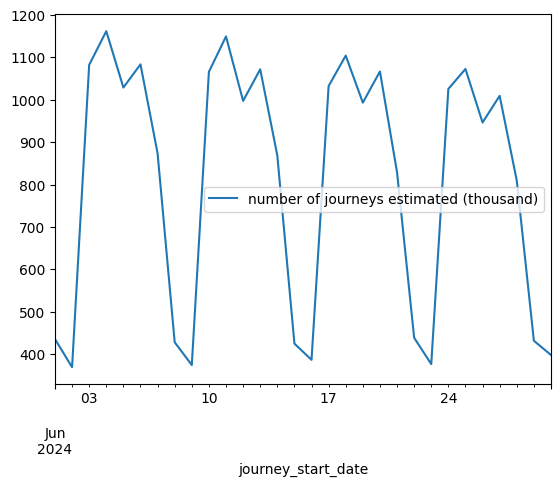

In [26]:
indicateur.plot()

Le calcul de l'indicateur et l'affichage du graph au cours du temps montre un effet de saisonnalité : les weekends il y a 2 à 3 fois moins de covoiturages. 